# Notebook Data Titanic

    Aqui está uma ilustração de um problema de análise de dados, aplicação de modelo de Machine Learning (ML), aqui neste trabalho o 'KNeighborsClassifier', usando do data set Titanic. Refêrencias e os dados utilizados podem ser encontrandos no final do trabalho.
    Este é um dos meus primeiros trabalhos em ML, o código está comentado tanto em inglês e português, Brasil. 
    
    Here a picutre of one problem about data analises, applying ML KNeighborsClassifier. I am not a inglish native speak so forgive me my grammar erros. The code has comments in english and Portuguese, Brazil.
    
    
    Author: Robert Garcia da Silva
    GitHub: https://github.com/RobertGarciadSilva/python-notebooksFiles/tree/master/notebooks/DataTitanic

<img src='./img/imgTitanic2.jpeg' style='width:500px;height:200px'>

## Análise exploratória de dados (Exploratory Data Analysis - EDA)

In [47]:

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.utils import shuffle
from sklearn import linear_model, preprocessing
from sklearn.neighbors import KNeighborsClassifier


In [48]:
# setting style seaborn
sns.set(style='ticks')

In [49]:
#Import data
dfTrain = pd.read_csv('./data/train.csv')


In [50]:
#head data
# Visualização das 5 primeiras linhas do DataSet.
dfTrain.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
#Some info
#Algumas informações sobre o dataSet.
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


    Considerando as informações obtidas acima, podemos observar que o data set possui relativamente baixa dimensionalidade, poucas colunas e linhas relativamente. Podemos observar também que a maior parte das colunas não apresenta problemas com valores faltantes, sendo a coluna 'Cabin' a coluna com maior problema de valores não preenchidos.

In [52]:
#Describe
# Descrição de alguns valores estatisticos, média, desvio padrão, min, max ..., para as colunas númericas.
dfTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


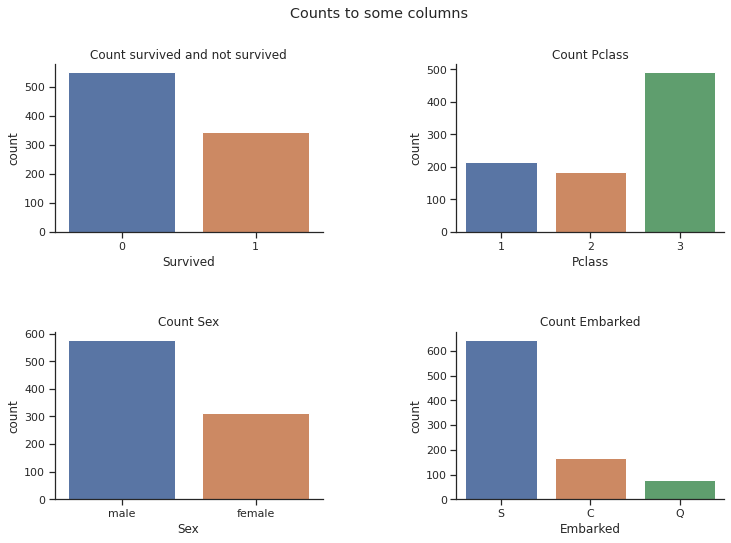

In [53]:
# Plot examples

fig, ([ax1, ax2],[ax3, ax4]) = plt.subplots(2,2, figsize=(12,8))
fig.suptitle('Counts to some columns')
fig.subplots_adjust(wspace=0.5, hspace=0.6)

Ax1 = sns.catplot(x='Survived', data=dfTrain, kind='count', ax=ax1)
Ax2 = sns.catplot(x='Pclass',data=dfTrain, kind='count', ax=ax2)
Ax3 = sns.catplot(x='Sex', data=dfTrain, kind='count', ax=ax3)
Ax4 = sns.catplot(x='Embarked', data=dfTrain, kind='count', ax=ax4)

ax1.set_title('Count survived and not survived')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.set_title('Count Pclass')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax3.set_title('Count Sex')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

ax4.set_title('Count Embarked')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

plt.close(Ax1.fig)
plt.close(Ax2.fig)
plt.close(Ax3.fig)
plt.close(Ax4.fig)

plt.show()

    Podemos ver observar que a maior parte das pessoas eram homens. A terceira classe apresenta maior quantidade de pessoas embarcadas e Suthampton foi a cidade com maior número de embarques. A maior parte das pessoas não sobreviveram.
    
    Here we can see that more people died and were 3 Pclass, the data have more male Sex, more people were Embarked on Southampton.

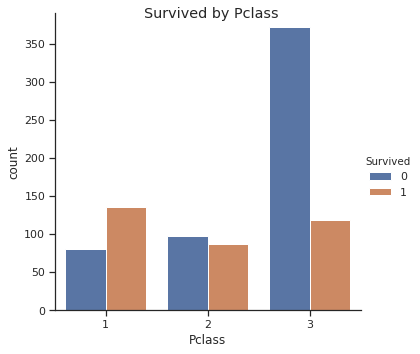

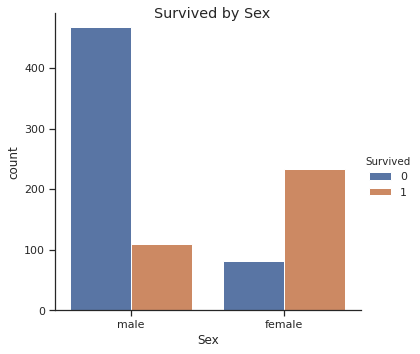

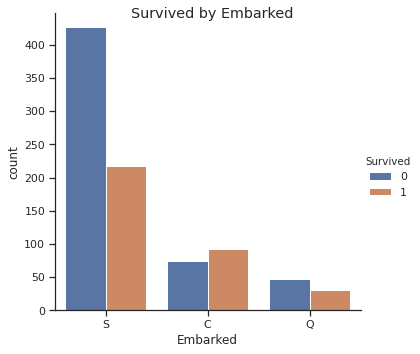

In [54]:
# Plots catplot, Survived by [someColumn]

# Survived by Pclass
g1 = sns.catplot(x='Pclass', data=dfTrain, hue='Survived', kind='count')
g1.fig.suptitle('Survived by Pclass')

# Survived by Sex
g2 = sns.catplot(x='Sex', data=dfTrain, hue='Survived', kind='count')
g2.fig.suptitle('Survived by Sex')

# Survived by Embarked
g3 = sns.catplot(x='Embarked', data=dfTrain, hue='Survived', kind='count')
g3.fig.suptitle('Survived by Embarked')

plt.show()

    Comparando os gráficos pode-se destacar que:
    - O maior número de mortos ocorreu na 3° classe e o menor na número na 1°, em que a 1º classe contém o maior número de sobreviventes.
    - Dentre homens e mulheres, as mulheres contam com maior número de sobreviventes.
    - O maior número de mortos ocorreu para os embarcantes na cidade de Southampton, o que provavelmente tem relação com o fato de ter-se mais embarcantes nesse cidade.

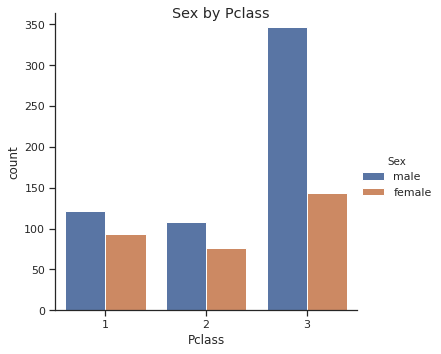

In [55]:

#Sex by Pclass
g = sns.catplot(x='Pclass', data=dfTrain, hue='Sex', kind='count')
g.fig.suptitle('Sex by Pclass')

plt.show()

    De forma rápida pode-se observar que a 3° classe é constituída grandemente por homes.

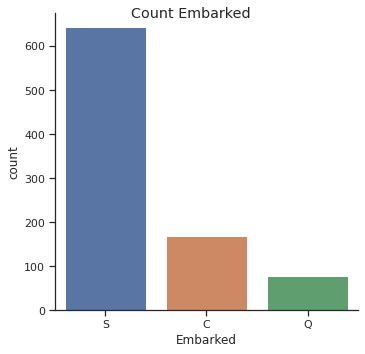

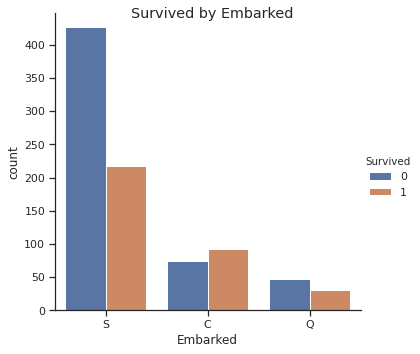

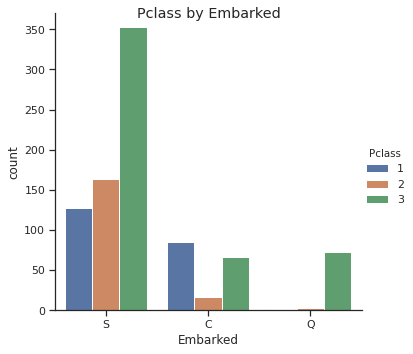

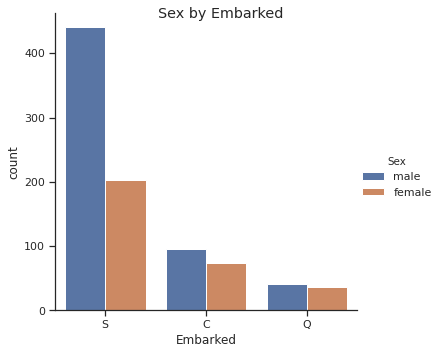

In [56]:
# Plot catplot, [SomeColumn by Embarked]

# Count Embarked, again
g0 = sns.catplot(x='Embarked', data=dfTrain, kind='count')
g0.fig.suptitle('Count Embarked')

# Survived by Embarked
g1 = sns.catplot(x='Embarked', data=dfTrain, hue='Survived', kind='count')
g1.fig.suptitle('Survived by Embarked')

# Pclass by Embarked
g2 = sns.catplot(x='Embarked', data=dfTrain, hue='Pclass', kind='count')
g2.fig.suptitle('Pclass by Embarked')

# Sex by Embarked
g3 = sns.catplot(x='Embarked', data=dfTrain, hue='Sex', kind='count')
g3.fig.suptitle('Sex by Embarked')

plt.show()

    Pode-se observar que a cidade de Southampton além de conter o maior número de embarcantes, esses embarcantes são na maioria homens pertencentes a 3° classe que apresentam baixa taxa de sobrevivência.

/home/garcia/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/garcia/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


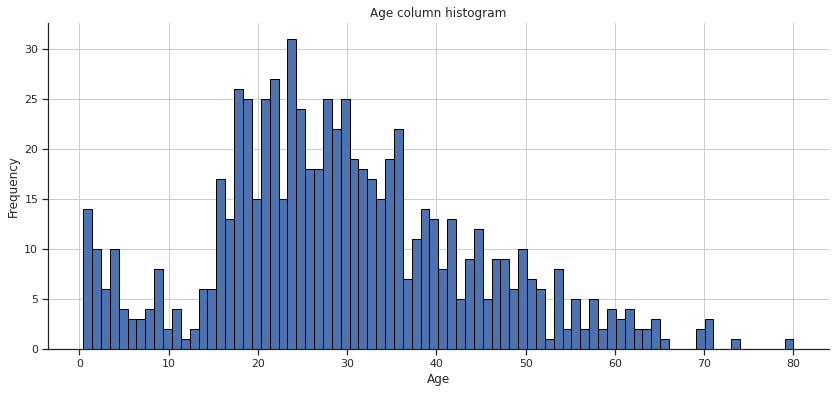

In [57]:
# Age column histogram

fig, ax = plt.subplots(figsize=(14,6))

ax.hist(dfTrain['Age'], bins=round(dfTrain['Age'].max()), edgecolor='black')
ax.set_title('Age column histogram')
ax.set_xlabel('Age')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()

plt.show()

    Segundo o histograma acima a grande parte dos embarcantes são jovens entre 16 e 36 anos, sendo que a moda, a idade que mais se repete é a de 24 anos.


Survived by Age


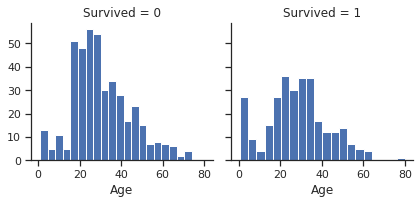


Sex by Age


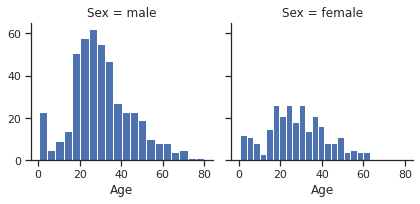


Pclass by Age


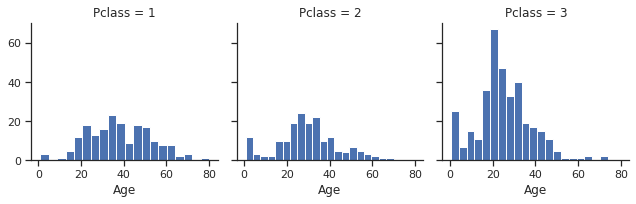


Embarked by Age


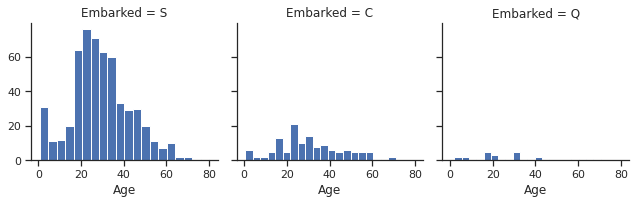

In [58]:
# Compare Age by [someColumn]

# Survived by Age
print('\nSurvived by Age')
g = sns.FacetGrid(dfTrain, col='Survived', margin_titles=True)
g.map(plt.hist, 'Age', bins=20)
#g.fig.suptitle('Surv. by Age')
plt.show()

# Sex by Age
print('\nSex by Age')
g2 = sns.FacetGrid(dfTrain,col='Sex')
g2.map(plt.hist,'Age', bins=20)
#g2.fig.suptitle('Sex by Age')
plt.show()

# Pclass by Age
print('\nPclass by Age')
g3 = sns.FacetGrid(dfTrain,col='Pclass')
g3.map(plt.hist, 'Age', bins=20)
#g3.fig.suptitle('Pclass by Age')
plt.show()

print('\nEmbarked by Age')
g4 = sns.FacetGrid(dfTrain, col='Embarked')
g4.map(plt.hist, 'Age', bins=20)
plt.show()

    Os histogramas acima nos permitem tirar mais informações sobre distribuição das idades entre os que sobreviveram e os que não sobreviveram, linha 'Survived by Age', a distribuição dos sexos entre as idades, 'Sex by Age', a distribuição das Classes pelas idades, 'Pclass by Age', em que podemos observar que a 3° classe contém o maior número de jovens e a distribuição das idades entre as cidades de embarque, onde pode-se observar que a cidade de Southampton é onde a maior parte dos jovens embarcaram.


Sex, Survived by Age


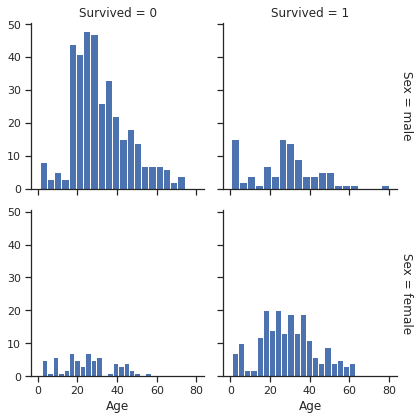

In [59]:
# Plot, example: Sex, Survived by Age

print('\nSex, Survived by Age')
g = sns.FacetGrid(dfTrain, row='Sex', col='Survived', margin_titles='True')
g.map(plt.hist, 'Age', bins=20)

plt.show()

    O exemplo acima nos permite comparar os dados das colunas 'Sex', 'Survived' e 'Age' ao mesmo tempo, em que podemos, por exemplo, observar a distribuição das idades para as mulheres que não sobreviveram, histogrma inferior a esquerda.

## Feature engeneering and more Plots

In [60]:
dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# copy the DataFrame
dfTrain2 = dfTrain.copy()
# dfTrain2 is dfTrain

In [62]:
# Dropped some columns that I will not use now.

dfTrain2 = dfTrain2.drop(['PassengerId','Ticket','Fare','Cabin','Name'],1) # 1 indicating that column will be dropped.
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [63]:
# See reference [3], Carlos Baia

# mapping values of Survived
survived_map = {0:'Died',1:'Survived'}
dfTrain2['Survived'] = dfTrain2['Survived'].map(survived_map)
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,Died,3,male,22.0,1,0,S
1,Survived,1,female,38.0,1,0,C
2,Survived,3,female,26.0,0,0,S
3,Survived,1,female,35.0,1,0,S
4,Died,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,Died,2,male,27.0,0,0,S
887,Survived,1,female,19.0,0,0,S
888,Died,3,female,NaN,1,2,S
889,Survived,1,male,26.0,0,0,C


In [64]:
# Modificando a coluna Age e criando uma nova coluna Age_cat (categorizando a coluna Age) a partir de Age

# Mean and median to age column
ageMedia = dfTrain2['Age'].mean() # it is more affect by extreme values
ageMediana = dfTrain2['Age'].median()
#print('Mean age column: ', ageMedia)
#print('Median age column: ',ageMediana)

# Substitui os valores Nan da coluna Age pelo valor medio de Age
def age_nanToMean(x):
    if(pd.isna(x)):
        return ageMedia
    else:
        return x

# Converte os valores dtype float64 para dtype int64 da coluna Age
def age_float64ToInt64(x):
    x = round(x)
    if(type(x) == np.float64):
        x = np.int64(x)
    return x


# Categoriza a coluna Age em 8 categorias baseado na idade.
def age_cat(x):
    if(x <= 10):
        x = 1
    elif(x > 10 and x <= 20):
        x = 2
    elif(x > 20 and x <= 30):
        x = 3
    elif(x > 30 and x <= 40):
        x = 4
    elif(x > 40 and x <= 50):
        x = 5
    elif(x > 50 and x <= 60):
        x = 6
    elif(x > 60 and x <= 70):
        x = 7
    elif(x > 70):
        x = 8
    return x

#Aplica a função age_nanToMean a coluna Age do dfTrain2
dfTrain2['Age'] = dfTrain2['Age'].apply(age_nanToMean)

#Aplica a função age_float64ToInt64 a coluna Age do dfTrain2
dfTrain2['Age'] = dfTrain2['Age'].apply(age_float64ToInt64)

#Cria uma nova coluna, Age_cat (age categorizada), no dataFrame dfTrain2 a partir da coluna Age
#aplicando a função age_cat
dfTrain2['Age_cat'] = dfTrain2['Age'].map(age_cat)

# print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat
0,Died,3,male,22,1,0,S,3
1,Survived,1,female,38,1,0,C,4
2,Survived,3,female,26,0,0,S,3
3,Survived,1,female,35,1,0,S,4
4,Died,3,male,35,0,0,S,4
...,...,...,...,...,...,...,...,...
886,Died,2,male,27,0,0,S,3
887,Survived,1,female,19,0,0,S,2
888,Died,3,female,30,1,2,S,3
889,Survived,1,male,26,0,0,C,3


    Observe o tratamento feito com os valores faltantes da coluna 'Age', estes valores faltantes foram preenchidos com o valor da média de Age.
    Observe logo abaixo também que os valores faltantes da coluna 'Embarked' foram preenchidos pela 'moda' da mesma coluna, ou seja, o valor que apresenta maior frequência.

In [65]:
# Trabalhando com a coluna Embarked

# See reference [3], Carlos Baia
# Mapeando os valores de embarked
embarked_map = {'S': 'Southampton', 'C':'Cherbourg', 'Q':'Queenstown'}

# Substituindo os valores Nan de Embarked pela moda de Embarked
def embarked_nanClear(x):
    if(pd.isna(x)):
        x = dfTrain2['Embarked'].mode()[0] # Obtém e atribui a 'moda' da coluna Embarked
    return x

# Aplicando o mapeamento, embarked_map, sobre a coluna Embarked
dfTrain2['Embarked'] = dfTrain2['Embarked'].map(embarked_map)

# Aplicando a função embarked_nanClear a coluna Embarked
dfTrain2['Embarked'] = dfTrain2['Embarked'].map(embarked_nanClear)

# Print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat
0,Died,3,male,22,1,0,Southampton,3
1,Survived,1,female,38,1,0,Cherbourg,4
2,Survived,3,female,26,0,0,Southampton,3
3,Survived,1,female,35,1,0,Southampton,4
4,Died,3,male,35,0,0,Southampton,4
...,...,...,...,...,...,...,...,...
886,Died,2,male,27,0,0,Southampton,3
887,Survived,1,female,19,0,0,Southampton,2
888,Died,3,female,30,1,2,Southampton,3
889,Survived,1,male,26,0,0,Cherbourg,3


In [66]:
# Criando uma nova coluna 'tam_family', tamanho da familia (acompanhantes), baseado
# na soma das colunas 'SibSp' e 'Parch'

# Criando nova coluna, 'tam_family' no dfTrain2
dfTrain2['tam_family'] = 0

# Preenchendo a coluna 'tam_family' com a soma das colunas 'SibSp' e 'Parch'
for i in range(len(dfTrain2['tam_family'])):
    dfTrain2.loc[i,'tam_family'] = (dfTrain2.loc[i,'SibSp'] + dfTrain2.loc[i,'Parch'])

# Print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat,tam_family
0,Died,3,male,22,1,0,Southampton,3,1
1,Survived,1,female,38,1,0,Cherbourg,4,1
2,Survived,3,female,26,0,0,Southampton,3,0
3,Survived,1,female,35,1,0,Southampton,4,1
4,Died,3,male,35,0,0,Southampton,4,0
...,...,...,...,...,...,...,...,...,...
886,Died,2,male,27,0,0,Southampton,3,0
887,Survived,1,female,19,0,0,Southampton,2,0
888,Died,3,female,30,1,2,Southampton,3,3
889,Survived,1,male,26,0,0,Cherbourg,3,0


    Apartir da coluna criada acima, 'tam_family' podemos plotar alguns gráficos. Observe abaixo:

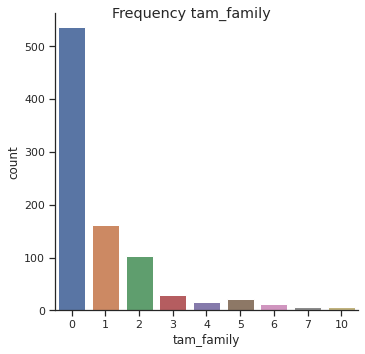

In [67]:

g = sns.catplot(x='tam_family', data=dfTrain2, kind='count')
g.fig.suptitle('Frequency tam_family') 

plt.show()

    A partir da plotagem acima podemos observar, por exemplo, que a maior parte dos passageiros viajou sozinha. Abaixo é representado algumas outras plotagens, em que podemos observar outras caracteristicas.

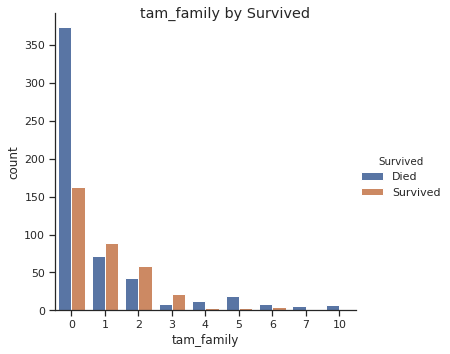

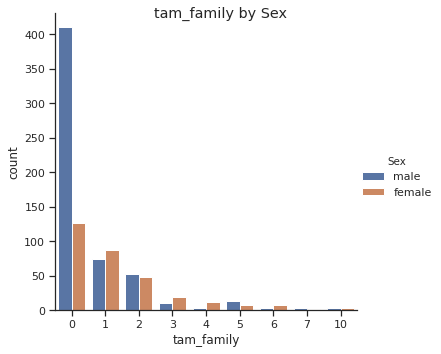

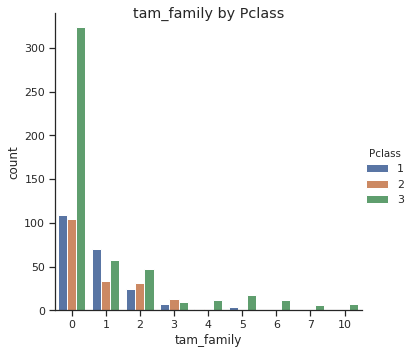

In [68]:
# Outras plotagens usando a coluna 'tam_family'

g = sns.catplot(x='tam_family', data=dfTrain2, hue='Survived', kind='count')
g.fig.suptitle('tam_family by Survived')

h = sns.catplot(x='tam_family', data=dfTrain2, hue='Sex', kind='count')
h.fig.suptitle('tam_family by Sex')

i = sns.catplot(x='tam_family', data=dfTrain2, hue='Pclass', kind='count')
i.fig.suptitle('tam_family by Pclass')

plt.show()

In [69]:
# Criando uma nova coluna 'is_alone' (está sozinho) baseado na coluna 'tam_family'

# Criando nova coluna, 'is_alone' no dfTrain2
dfTrain2['is_alone'] = 0

# Preeche a coluna 'is_alone' baseado na coluna 'tam_family'. Se 'tam_family' é igual a 0 significa que
# o passageira estava desacompanhado, sozinho.

for i in range(len(dfTrain2['is_alone'])):
    if(dfTrain2.loc[i,'tam_family'] >= 1):
        dfTrain2.loc[i,'is_alone'] = 1


In [70]:
# Trabalhando com a coluna 'Name'
# Get the Name titles

nameCol = dfTrain['Name']
titleName = []

#Obtem dos os títulos dos nomes, exemplo: 'Mr.', 'Miss.', 'Mrs.', ....
for i in nameCol:
    tempSplitName = i.split(' ')# Divide cada nome, pelo espaço em branco, formando uma lista
    tempIndex = 1
    for i in range(len(tempSplitName)):
        if(tempSplitName[i].find('.') >= 1):#verifica em qual index, lugar da lista, (nome), está o título do nome.
            tempIndex = i
            break
    titleName.append(tempSplitName[tempIndex]) #armazena o título do nome obtido na lista titleName.
    tempSplitName.clear() # lima a lista tempSplitName para uma nova iteração.

    
# Cria um dataFrame com uma coluna, chamada 'Name', com os valores dos títulos dos nomes.
dfTitleName = pd.DataFrame(titleName, columns=['Name'])

# Cria uma nova coluna, 'Name', no dfTrain2 e preenche com os valores de dfTitleName
dfTrain2['Name'] = dfTitleName.copy()

#print(dfTrain2[dfTrain2['Name'] == 'Capt.']) # Capitão não sobreviveu

# value_counts() sobre a coluna 'Name' do dfTrain2, criada e preenchida acima.
namesValueCounts = dfTrain2['Name'].value_counts(); 

# Print out value_counts column 'Name'.
namesValueCounts

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Ms.            1
Lady.          1
Jonkheer.      1
Capt.          1
Don.           1
Mme.           1
Sir.           1
Countess.      1
Name: Name, dtype: int64

In [71]:
# Obtem os titulos dos nomes que ocorrem poucas vezes

k = namesValueCounts.keys() # obtem as keys sobre value_counts() obtido acima. obtem os valores 'Mr.', 'Miss.',...
otherNames = []

for i in range(len(namesValueCounts)):
    if(namesValueCounts[i] <= 5):#veririca se o título do nome possui menos que 5 ocorrências.
        otherNames.append(k[i])#armazena em otherNames as keys que possuem menos que 5 ocorrências.

# print out, títulos dos nomes que ocorrem poucas vezes, menor que 5 ocorrências.
otherNames

['Major.',
 'Mlle.',
 'Col.',
 'Ms.',
 'Lady.',
 'Jonkheer.',
 'Capt.',
 'Don.',
 'Mme.',
 'Sir.',
 'Countess.']

In [72]:
# Change the Name column. Substitui os valores que ocorrem poucas vezes, obtido acima por 'OtherTitle'.

# troca os titulos que ocorrem poucas vezes, obtido acima, pela label, rótulo 'otherTitle'.
# Exemplo, substitui as ocorrenceas de 'Major' por 'otherTitle'. 
def change_titleToOtherTitle(x):
    for i in otherNames:
        if(x == i):
            return 'OtherTitle'
    return x

#Aplica a função 'change_titleToOtherTitle' sobre a coluna 'Name' do dfTrain2
dfTrain2['Name'] = dfTrain2['Name'].apply(change_titleToOtherTitle)

#Print out value_counts() current column 'Name' do dfTrain2
dfTrain2['Name'].value_counts()

Mr.           517
Miss.         182
Mrs.          125
Master.        40
OtherTitle     14
Dr.             7
Rev.            6
Name: Name, dtype: int64

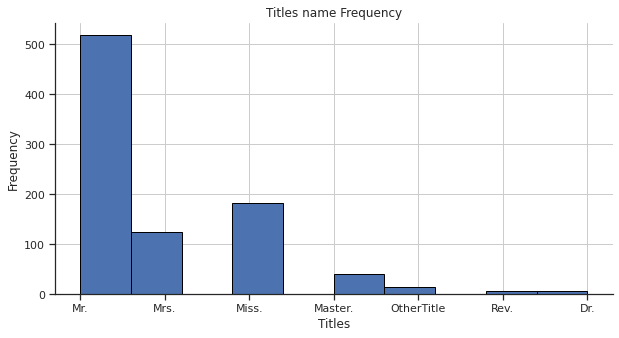

In [73]:
# Plotando a distribuição dos títulos.

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(dfTrain2['Name'], edgecolor='black')
ax.set_title('Titles name Frequency')
ax.set_xlabel('Titles')
ax.set_ylabel('Frequency')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid()

plt.show()

In [74]:
# Trabalhando com a coluna 'Fare'

# Using coluna 'Fare', categorizando-a.

fareMin = dfTrain['Fare'].min()
fareMax = dfTrain['Fare'].max()
stepFare = round(fareMax/5) # steps para categorizar. Valor mais ou menos arbitrario.

# Função para categorizar a coluna 'Fare'. Nesse exemplo, cria 5 categorias baseado nos valores de 'Fare'
def cat_fare(x):
    x = round(x)
    if(x <= round(stepFare)):
        return 1
    elif(x > stepFare and x <= 2*stepFare):
        return 2
    elif(x > 2*stepFare and x <= 3*stepFare):
        return 3
    elif(x > 3*stepFare and x <= 4*stepFare):
        return 4
    else:
        return 5

#Cria a coluna 'cat_fare' e preenche seus valores com a função 'cat_fare'     
dfTrain2['cat_fare'] = dfTrain['Fare'].apply(cat_fare)

# Print out current 'cat_fare' do dfTrain2
dfTrain2['cat_fare'].value_counts()

1    838
2     33
3     17
5      3
Name: cat_fare, dtype: int64

In [75]:

#Print out current dfTrain2
dfTrain2

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Age_cat,tam_family,is_alone,Name,cat_fare
0,Died,3,male,22,1,0,Southampton,3,1,1,Mr.,1
1,Survived,1,female,38,1,0,Cherbourg,4,1,1,Mrs.,1
2,Survived,3,female,26,0,0,Southampton,3,0,0,Miss.,1
3,Survived,1,female,35,1,0,Southampton,4,1,1,Mrs.,1
4,Died,3,male,35,0,0,Southampton,4,0,0,Mr.,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,Died,2,male,27,0,0,Southampton,3,0,0,Rev.,1
887,Survived,1,female,19,0,0,Southampton,2,0,0,Miss.,1
888,Died,3,female,30,1,2,Southampton,3,3,1,Miss.,1
889,Survived,1,male,26,0,0,Cherbourg,3,0,0,Mr.,1


## Applying model ML

In [76]:
# Features and labels

#features aos quais irá se aplicar o modelo de ML
features = ['Pclass', 'Sex','Embarked','Age_cat','tam_family','Name','cat_fare']

# Label para ML
label = 'Survived'

In [77]:
# Usando LabelEncoder para categorizar todas as features, obtendo valores int, para se aplicar o modelo Ml.

labEncod = preprocessing.LabelEncoder()

feat = []

for i in features:
    feat.append(labEncod.fit_transform(list(dfTrain2[i])))
    
z = zip(*feat)   
# mesmo efeito que: z = zip(feat[0],feat[1],feat[2],feat[3],feat[4],feat[5],feat[6], ...), ou seja,
# zipar uma lista de listas.
    

x = list(z) #features encoded
y = list(labEncod.fit_transform(list(dfTrain[label]))) #label encoded



In [81]:
# Aplicando modelo ML, KNeighborsClassifier.
# 

n = 1000 # número de vezes para rodar a aplicação do modelo para se obter a melhor accuracia dentre esse numero de vezes.
bAccuracy = 0 # armazena melhor acuracia obtida.
bModel = 0 # armazena melhor modelo obtido.

for i in range(n):
    
    # separa os dados em train e test, pegando 10% dos dados para test
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    # Cria instancia do modelo KNeighborsClassifier com 9 vizinhos
    model = KNeighborsClassifier(n_neighbors=9)

    # aplica o modelo KNeighborsClassifier aos dados de treino.
    model.fit(x_train,y_train)
    
    # teste o modelo obtido na linha acima aos dados de teste para se obter a acurâcia.
    accuracy = model.score(x_test,y_test)
    
    # verifica e armazena o melhor modelo obtido dentro do número de vezes que se rodou o modelo.
    if(accuracy > bAccuracy):
        bAccuracy = accuracy
        bModel = model

        
# Print out melhor Accuracy obtida        
print('Accuracy: ', bAccuracy)


Accuracy:  0.9222222222222223


In [82]:
#Predicted

example = []

#Applying model about x_test
predicted = bModel.predict(x_test)

for i in range(len(x_test)):
    example.append([predicted[i], x_test[i], y_test[i]])

#Building a DataFrame with example values 
dfExample = pd.DataFrame(example, columns=['Predicted','features','RealValue'])

#Print out dfExample
dfExample

,Predicted,features,RealValue
0,1,"(0, 0, 0, 2, 0, 2, 0)",1
1,1,"(2, 0, 2, 0, 0, 2, 0)",1
2,0,"(2, 1, 2, 4, 0, 3, 0)",0
3,0,"(1, 1, 0, 2, 3, 3, 0)",0
4,1,"(2, 0, 0, 1, 1, 2, 0)",0
...,...,...,...
85,0,"(2, 1, 2, 7, 0, 3, 0)",0
86,0,"(2, 1, 2, 2, 0, 3, 0)",0
87,1,"(1, 0, 2, 0, 2, 2, 0)",1
88,0,"(1, 1, 2, 2, 0, 3, 0)",0


## References


    [1]https://www.kaggle.com/gulyvz/statistics-101
    [2]https://www.kaggle.com/startupsci/titanic-data-science-solutions
    [3]https://medium.com/@carlosbaia/visualiza%C3%A7%C3%A3o-e-an%C3%A1lise-de-dados-811780fd0e9f
    [4]https://seaborn.pydata.org/tutorial/axis_grids.html
    [5]https://techwithtim.net/tutorials/machine-learning-python/k-nearest-neighbors-3/
    [6]https://www.kaggle.com/c/titanic
 


